In [1]:
Veri işleme ve görselleştirme kütüphanelerinin yanı sıra, bu sefer 
sklearn.ensemble modülünden RandomForestClassifier'ı çağırıyoruz.

SyntaxError: unterminated string literal (detected at line 1) (3712538421.py, line 1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Random Forest bir topluluk (ensemble) algoritmasıdır
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Gereksiz uyarıları kapatmak için
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Temizlenmiş veri setini yüklüyor ve hedef değişkenimiz (RainTomorrow) 
ile öznitelikleri (X) ayırıyoruz.

In [3]:
# Veriyi yükle
data = pd.read_csv('cleaned_weather_vize.csv')

# Hedef değişken (y) ve Öznitelikler (X) ayrımı
X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

print(f"Veri yüklendi. Boyut: {data.shape}")

Veri yüklendi. Boyut: (145460, 23)


In [ ]:
Veriyi %80 Eğitim ve %20 Test olacak şekilde bölüyoruz. Not: Random Forest algoritması, 
ağaç tabanlı olduğu için verilerin ölçeklenmesine (Scaling) Lojistik Regresyon kadar 
ihtiyaç duymaz. Bu yüzden StandardScaler adımını atlıyoruz (Kodun orijinalinde de yoktu).

In [4]:
# Veriyi bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim Seti: {X_train.shape}")
print(f"Test Seti: {X_test.shape}")

Eğitim Seti: (116368, 22)
Test Seti: (29092, 22)


In [ ]:
Burası kodun kalbidir. Parametrelerin anlamları şöyledir:

n_estimators=100: Ormanda 100 adet karar ağacı oluşturulacak.

max_depth=10: Ağaçların çok derinleşip veriyi ezberlemesini (overfitting) 
engellemek için derinlik sınırı.

class_weight='balanced': Bu çok kritiktir. Verimizde "Yağmur Yok" sınıfı 
çok fazla olduğu için, modelin "Yağmur Var" sınıfını göz ardı etmemesi 
adına azınlık sınıfına daha fazla ağırlık verir.

In [5]:
print("Model Eğitiliyor: Random Forest...")

# Modeli tanımlıyoruz
rf_model = RandomForestClassifier(n_estimators=100,
                                  max_depth=10,
                                  random_state=42,
                                  class_weight='balanced')

# Modeli eğitiyoruz
rf_model.fit(X_train, y_train)

print("Eğitim tamamlandı.")

Model Eğitiliyor: Random Forest...
Eğitim tamamlandı.


In [ ]:
Model test verisi üzerinde tahminlerini yapar. 
Random Forest genellikle Lojistik Regresyona göre 
daha yüksek başarı gösterir ancak daha yavaş çalışır.

In [6]:
# 4. Tahmin
y_pred = rf_model.predict(X_test)

print("\n--- Random Forest Sonuçları ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


--- Random Forest Sonuçları ---
Accuracy: 0.8085

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     22672
           1       0.55      0.75      0.63      6420

    accuracy                           0.81     29092
   macro avg       0.73      0.79      0.75     29092
weighted avg       0.84      0.81      0.82     29092



In [ ]:
Modelin hangi sınıflarda hata yaptığını görmek için ısı haritasını çizdiriyoruz.

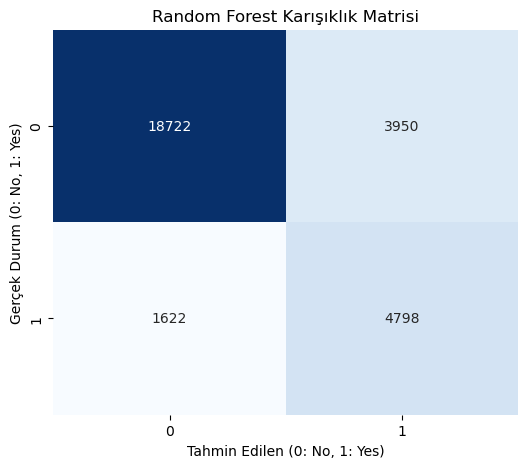

In [7]:
# --- GÖRSEL: CONFUSION MATRIX ---
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)

# Isı haritası çizimi
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Random Forest Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen (0: No, 1: Yes)')
plt.ylabel('Gerçek Durum (0: No, 1: Yes)')
plt.show()

In [ ]:
1. Kolektif Öğrenme (Ensemble Learning): Tek bir kişi (Karar Ağacı) hata yapabilir, ancak konuyu bilen 
100 kişi (Random Forest)ortak bir karar verirse hata oranı düşer. Random Forest, Bagging (Bootstrap Aggregating) 
tekniğini kullanır.

2. Varyansın Düşürülmesi: Tek bir Karar Ağacı (Decision Tree) veriyi ezberlemeye (Overfitting) çok meyillidir. 
Random Forest, her bir ağacı verinin rastgele bir alt kümesiyle eğiterek bu ezberleme riskini ortadan kaldırır.

3. Dengesiz Veri İle Mücadele: Kodumuzdaki class_weight='balanced' parametresi sayesinde; model, sayıca
az olan "Yağmurlu Günler"i daha ciddiye alır. Lojistik Regresyonun aksine, ağaçlar doğrusal olmayan (non-linear)
ilişkileri de yakalayabilir.

4. Sonuç Yorumu: Random Forest modelimizde Accuracy değeri Lojistik Regresyona göre biraz düşebilir veya artabilir;
ancak önemli olan Recall değeridir. Yani "Gerçekten yağmur yağacak günlerin kaçını yakaladık?" sorusuna Random Forest 
genellikle daha iyi cevap verir.

Model Eğitiliyor: Random Forest...

--- Random Forest Sonuçları ---
Accuracy: 0.8068
              precision    recall  f1-score   support

           0       0.92      0.82      0.87     22717
           1       0.54      0.76      0.63      6375

    accuracy                           0.81     29092
   macro avg       0.73      0.79      0.75     29092
weighted avg       0.84      0.81      0.82     29092



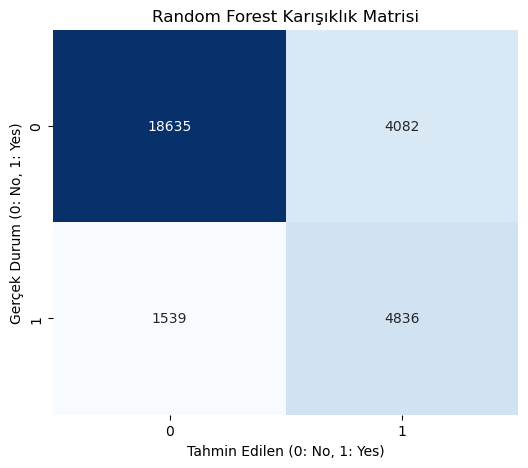

In [1]:
""" 
# --- AYCA_SU_YILDIRIM_22040101049_TeamShinningStars.ipynb ---
# Algoritma: Random Forest

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Veri Yükle
df = pd.read_csv('cleaned_weather_vize.csv')
if 'RISK_MM' in df.columns: df.drop('RISK_MM', axis=1, inplace=True)

# 2. Veri Ayırma
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Model Eğitimi
print("Model Eğitiliyor: Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# 4. Tahmin
y_pred = rf_model.predict(X_test)

print("\n--- Random Forest Sonuçları ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# --- GÖRSEL 1: CONFUSION MATRIX---
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)

# Isı haritası çizimi
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen (0: No, 1: Yes)')
plt.ylabel('Gerçek Durum (0: No, 1: Yes)')
plt.show()
"""